In [1]:
#特征选择  feature_selectiom

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("digit recognizor.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [6]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
#1、过滤法 

In [10]:
#1.1 方差过滤 VarianceThreshold  

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
selector=VarianceThreshold()#实例化

In [13]:
selector=selector.fit_transform(x)

In [14]:
selector.shape

(42000, 708)

In [15]:
import numpy as np

In [16]:
np.median(x.var().values)#方差的中值

1352.286703180131

In [17]:
x_fsvar=VarianceThreshold(1352.286703180131).fit_transform(x)#实例化

In [18]:
x_fsvar.shape

(42000, 392)

In [19]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(x)
X_bvar.shape

(42000, 685)

In [20]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [21]:
# cross_val_score(KNN(),X,y,cv=5).mean()

In [22]:
# %%timeit
# cross_val_score(KNN(),X,y,cv=5).mean()

In [23]:
#3.1.2 相关性过滤

In [24]:
#3.1.2.1 卡方过滤

In [25]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
X_fschi=SelectKBest(chi2,k=300).fit_transform(x_fsvar,y)#chi2:依赖的检验量，使用的是卡方 k：特征数量

In [36]:
X_fschi.shape

(42000, 300)

In [37]:
cross_valcore(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9344761904761905

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

score=[]
for i in range(390,200,-10):
        X_fschi=SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
        once=cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
        score.append(once)


In [47]:
score

[0.9397380952380953,
 0.9383809523809523,
 0.9386428571428571,
 0.9372142857142857,
 0.9386428571428571,
 0.9380714285714287,
 0.9384047619047617,
 0.9343809523809524,
 0.9351428571428573,
 0.9344761904761905,
 0.933642857142857,
 0.9325714285714286,
 0.9305,
 0.9288095238095238,
 0.9287142857142857,
 0.9245238095238095,
 0.9235714285714286,
 0.9207142857142857,
 0.9193571428571428]

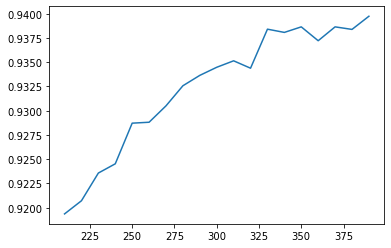

In [49]:
plt.plot(range(390,200,-10),score)

In [ ]:
plt.show()

In [50]:
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar,y)

In [52]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [53]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [54]:
k = F.shape[0] - (pvalues_f > 0.05).sum()
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()


In [57]:
k

392

In [58]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [59]:
result = MIC(X_fsvar,y)

In [60]:
k = result.shape[0] - sum(result <= 0)

In [61]:
#3.2 Embedded嵌入法

In [63]:
#feature_selection.SelectFromModel

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [65]:
RFC_=RFC(n_estimators=10,random_state=0)

In [67]:
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)

In [68]:
X_embedded.shape

(42000, 47)

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
RFC_.fit(X,y).feature_importances_.max()

0.01276360214820271

In [77]:
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
threshold

array([0.        , 0.00067177, 0.00134354, 0.00201531, 0.00268707,
       0.00335884, 0.00403061, 0.00470238, 0.00537415, 0.00604592,
       0.00671769, 0.00738945, 0.00806122, 0.00873299, 0.00940476,
       0.01007653, 0.0107483 , 0.01142007, 0.01209183, 0.0127636 ])

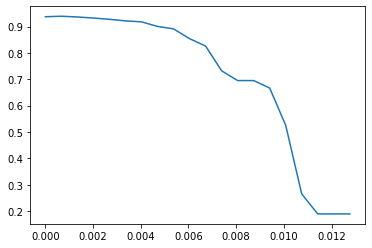

In [78]:
score = []
for i in threshold:
      X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
      once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
      score.append(once)
plt.plot(threshold,score)
plt.show()